# **Fake news detection**

Fake news detection is a critical task in the field of data science and machine learning, with applications in various domains such as media, social networks, and cybersecurity, aimed at identifying misleading or false information

# **1. Import Libraries**




In [35]:
!pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

pandas is used for data manipulation with structured data like CSVs and DataFrames, while numpy supports large arrays and mathematical functions. matplotlib.pyplot helps create visualizations, and seaborn enhances those visualizations with statistical plots. CountVectorizer converts text into numerical features, and TfidfTransformer weighs word importance using TF-IDF. sklearn provides tools for feature extraction, model training, data splitting, and preprocessing. accuracy_score evaluates model performance, train_test_split divides the dataset into training and testing sets, and Pipeline combines preprocessing and modeling steps into one process.

# **2. Loading the Dataset**

In [14]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

This loads the fake and true news datasets.

# **3. Checking Fake Dataset Shape**

In [15]:
fake.shape

(23481, 4)

This will give you the dimensions (rows and columns) of the fake dataset.

# **4. Checking the Shape of the True Dataset**

In [16]:
true.shape

(21417, 4)

This will give you the dimensions (rows and columns) of the true dataset.

# **5. Labeling the Datasets**

In [17]:
fake['target'] = 'fake'
true['target'] = 'true'

This adds a new column 'target' to both datasets with labels "fake" and "true" for the respective datasets.

# **6. Concatenating the Datasets**

In [18]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

This will concatenate the datasets and display their shape.

# **7. Viewing the Top Rows of the Dataset**

In [19]:
data.head(5)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


# **8. Viewing the Last Few Rows of the Dataset**

In [20]:
data.tail(5)

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


# **9. Shuffling the Dataset**

In [21]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

This shuffles the rows of the data DataFrame to randomize the order and resets the index to maintain a continuous sequence.

# **10. Inspecting the Dataset Information**

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


This will give you an overview of the data DataFrame, including the number of non-null entries, data types, and memory usage.

# **11. Dropping the Unnecessary Column**

In [23]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Trump Humiliates Himself And Wastes Time At G...,Incapable of putting his f*cking phone down du...,News,fake
1,AMTRAK FACTS AND WHY AMERICANS SHOULDN’T TRUST...,The Democrats didn t waste any time pushing fo...,politics,fake
2,DR. WOLF CALLS OUT HILLARY For Lying About Pne...,Dr. Milton Wolf seems to have take offense at ...,Government News,fake
3,Factbox: Contenders for key jobs in Trump's ad...,(Reuters) - Below are people mentioned as cont...,politicsNews,true
4,Philippines' Duterte threatens to close mines ...,MANILA (Reuters) - Philippine President Rodrig...,worldnews,true


In [24]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Incapable of putting his f*cking phone down du...,News,fake
1,The Democrats didn t waste any time pushing fo...,politics,fake
2,Dr. Milton Wolf seems to have take offense at ...,Government News,fake
3,(Reuters) - Below are people mentioned as cont...,politicsNews,true
4,MANILA (Reuters) - Philippine President Rodrig...,worldnews,true


# **12. Converting Text to Lowercase**

In [ ]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,so much outrage by so many corrupt people it s...,politics,fake
1,donald trump is no stranger to doing business ...,News,fake
2,moscow (reuters) - u.s. undersecretary of stat...,worldnews,true
3,istanbul (reuters) - turkey said on sunday tha...,worldnews,true
4,tokyo (reuters) - u.s. president donald trump ...,politicsNews,true


This step standardizes the text by converting all characters to lowercase, ensuring consistency in the dataset before further processing.

# **13. Removing Punctuation from Text**

In [25]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

This step cleans the text data by removing all punctuation, ensuring that the text is free from special characters.

# **14. Inspecting Data After Preprocessing**

In [26]:
data.head()

,text,subject,target
0,Incapable of putting his fcking phone down dur...,News,fake
1,The Democrats didn t waste any time pushing fo...,politics,fake
2,Dr Milton Wolf seems to have take offense at t...,Government News,fake
3,Reuters Below are people mentioned as contend...,politicsNews,true
4,MANILA Reuters Philippine President Rodrigo D...,worldnews,true


# **15. Removing Stopwords from Text**

In [27]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


This step removes common stopwords (such as "the," "and," "is") from the **'text'** column, helping to reduce irrelevant words and improve the clarity and quality of the text data for more effective analysis.

In [28]:
data.head()

,text,subject,target
0,Incapable putting fcking phone important overs...,News,fake
1,The Democrats waste time pushing funding Amtra...,politics,fake
2,Dr Milton Wolf seems take offense diagnosis Hi...,Government News,fake
3,Reuters Below people mentioned contenders seni...,politicsNews,true
4,MANILA Reuters Philippine President Rodrigo Du...,worldnews,true


# **16. Data Exploration**

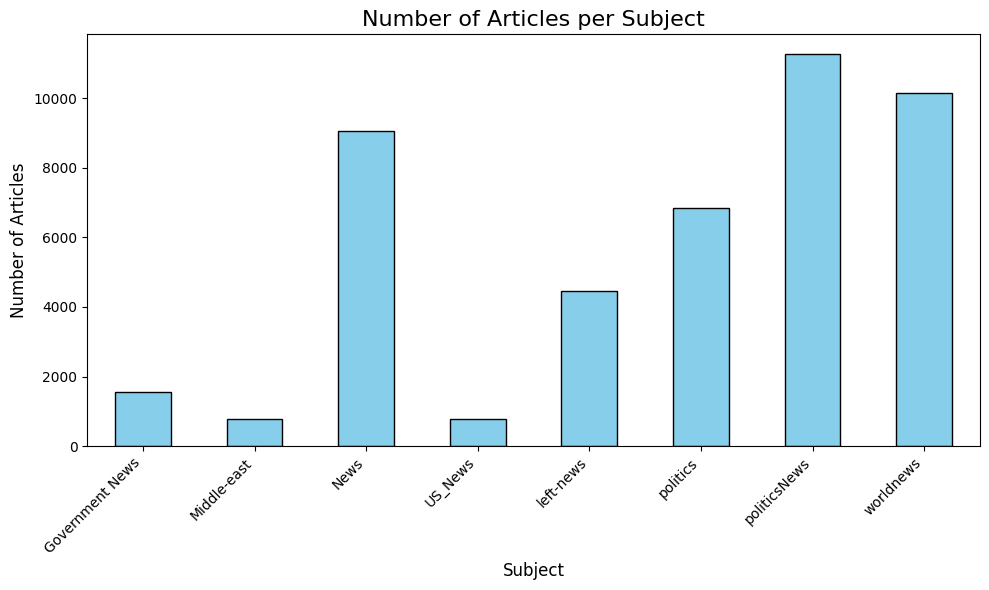

In [31]:
subject_counts = data.groupby(['subject'])['text'].count()
plt.figure(figsize=(10, 6))
subject_counts.plot(kind="bar", color='skyblue', edgecolor='black')
plt.title('Number of Articles per Subject', fontsize=16)
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This analysis provides a quick overview of the dataset by examining the distribution of articles across various subjects, helping you understand the dataset’s structure and content.

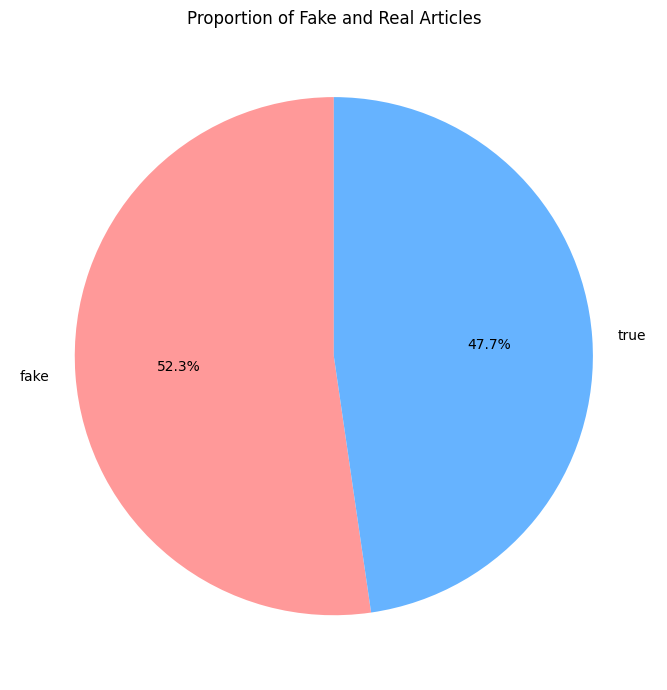

In [34]:
article_counts = data.groupby(['target'])['text'].count()
article_counts.plot(kind="pie", autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], figsize=(7, 7), startangle=90)
plt.title('Proportion of Fake and Real Articles')
plt.ylabel('')
plt.tight_layout()
plt.show()

This visualization presents the proportion of fake and real articles in the dataset using a pie chart, providing a clear view of their distribution.

# **17. Word Cloud for Fake Articles**

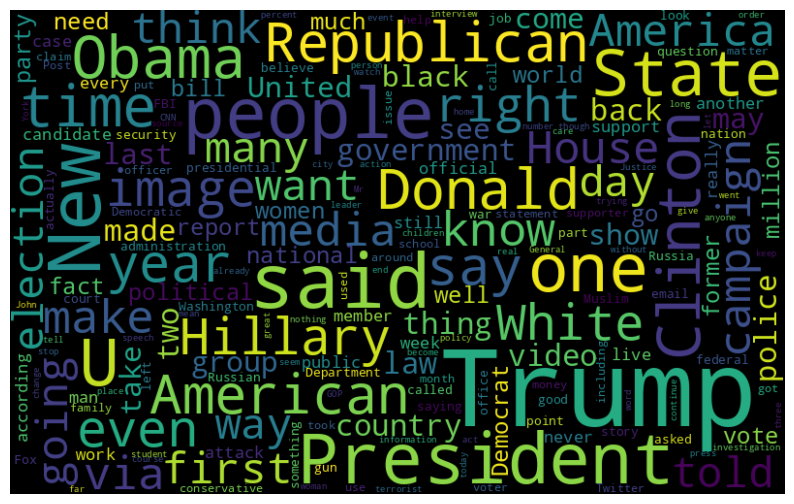

In [36]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This word cloud visualizes the most frequent words in fake articles, highlighting key terms that appear often within this subset of the dataset.

# **18. Word cloud for real news**

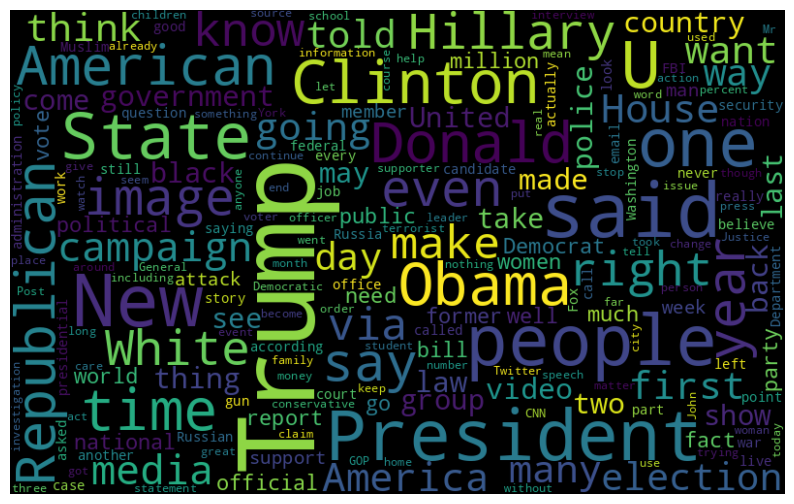

In [37]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This generates a word cloud for real articles, showcasing the most frequently used words in the true articles.

# **19. Token Frequency Visualization**

In [53]:
token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns="Frequency", n=quantity)
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(data=df_frequency, x="Word", y="Frequency", hue="Word", palette="viridis", legend=False)
    ax.set_title(f"Top {quantity} Most Frequent Words", fontsize=16)
    ax.set_xlabel("Words", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

This function generates a bar plot for the most frequent tokens in a specified text column, allowing you to visualize the most common words in the dataset.

# **20. Most Frequent Words in Fake Articles**

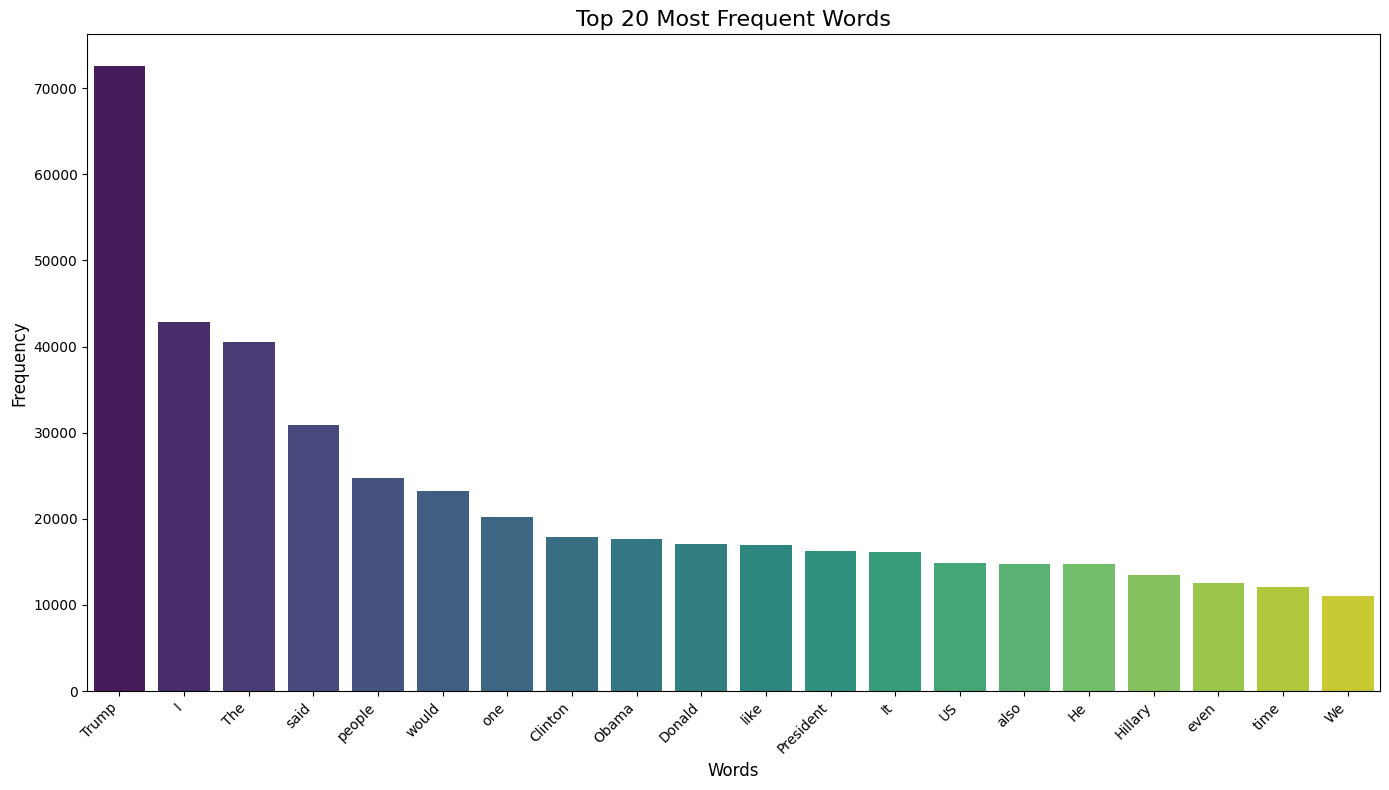

In [54]:
counter(data[data["target"] == "fake"], "text", 20)

# **21. Most Frequent Words in Real Articles**

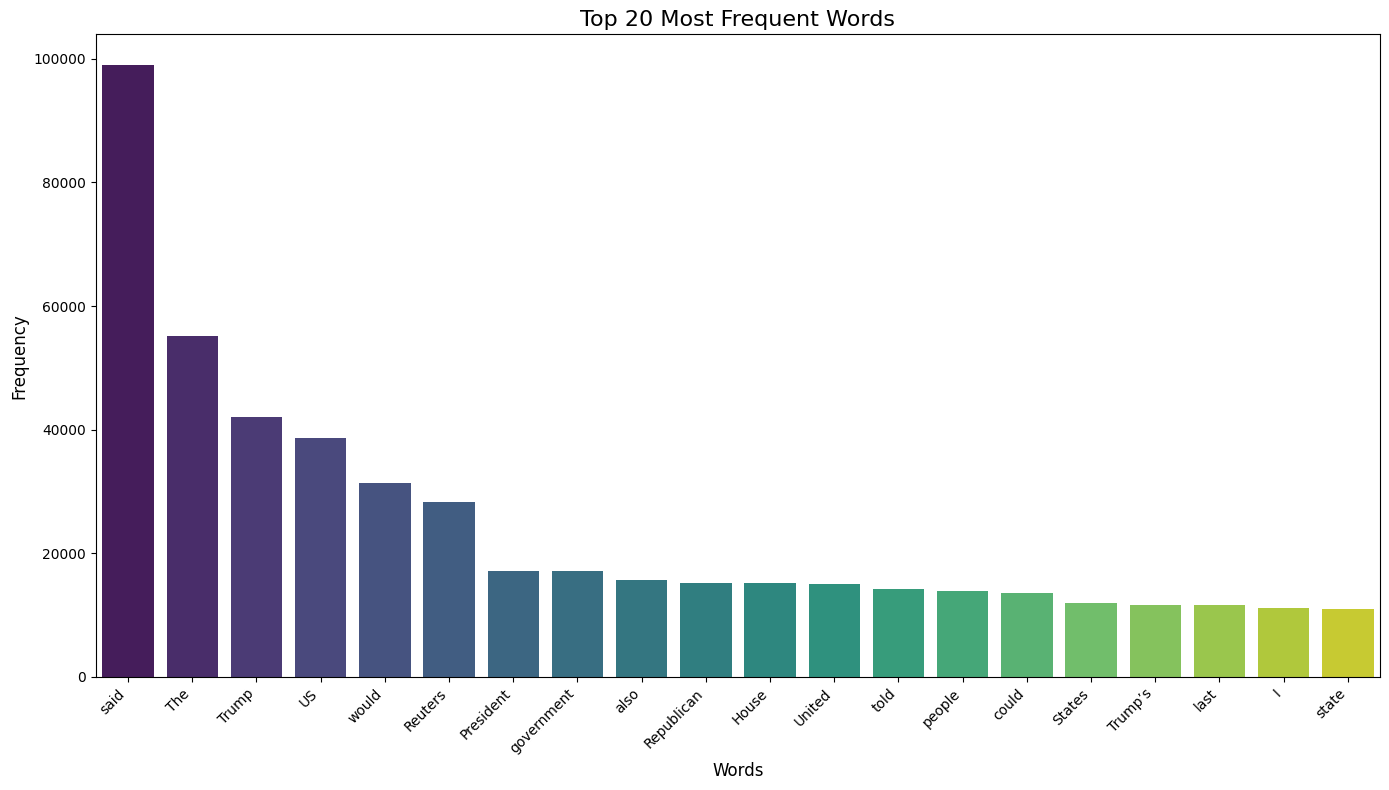

In [55]:
counter(data[data["target"] == "true"], "text", 20)

# **22. Building and Training the Model**

In [56]:
from sklearn import metrics
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

This function visualizes the confusion matrix, providing insight into the performance of a classification model. You can display either the raw or normalized confusion matrix using a color-coded heatmap, helping to identify false positives, false negatives, and overall accuracy of the model's predictions.

# **23. Data Splitting for Training and Testing**

In [57]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [58]:
X_train.head()

,text
36335,According nationwide poll many 2 million nonci...
12384,MOSCOW Reuters Russia Foreign Ministry said Fr...
24419,In Trump administration ongoing war LGBTQ comm...
24740,At point well known limit low Donald Trump sin...
27039,WASHINGTON Reuters Republican tax legislation ...


In [59]:
y_train.head()

,target
36335,fake
12384,true
24419,fake
24740,fake
27039,true


This step involves splitting the dataset into training and testing subsets, ensuring that the model can be trained on one portion of the data and evaluated on a separate portion to assess its performance.

# **24. Training the Model with Random Forest Classifier**

In [60]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=100, random_state=42))])

model = pipe.fit(X_train, y_train)

prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))

accuracy: 99.06%


We trained a Random Forest Classifier using TF-IDF features to classify fake and real news articles, achieving **99.6% accuracy**. This indicates strong performance, but further evaluation with metrics like precision, recall, and F1-score is needed to ensure the model isn't overfitting and is generalizing well.

# **25. Confusion Matrix for Model Evaluation**

Confusion matrix, without normalization


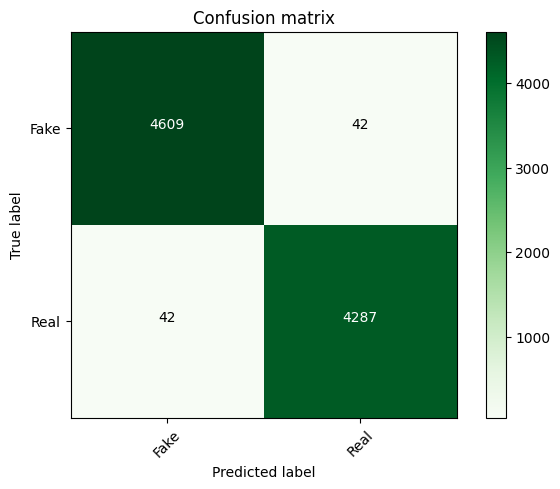

In [68]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

The confusion matrix helps visualize the model's classification performance, showing the distribution of correct and incorrect predictions for fake and real news articles.

# **26. Classification Report Heatmap**

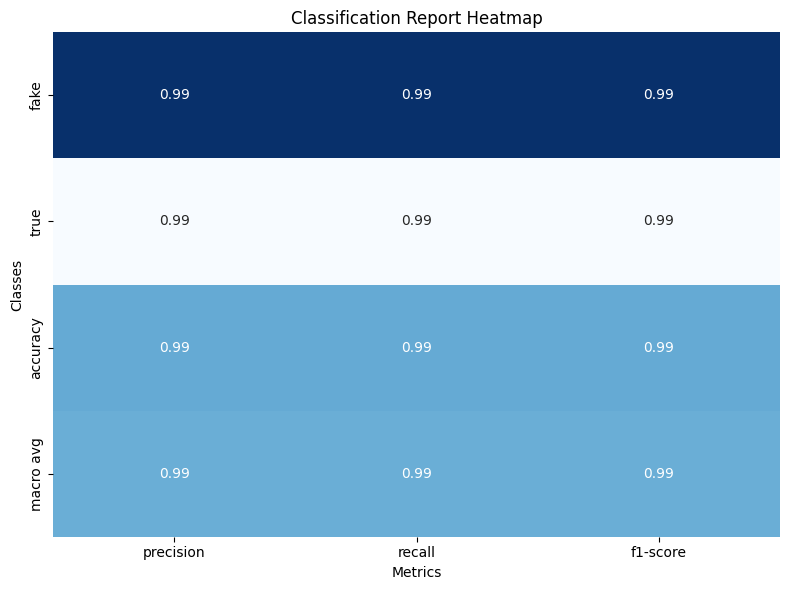

In [72]:
report = classification_report(y_test, prediction, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.tight_layout()
plt.show()

The Classification Report Heatmap provides a visual representation of the model's performance across precision, recall, and F1-score for each class. It allows a clearer understanding of how well the model distinguishes between fake and real news articles, making it easy to identify any potential issues such as imbalances or low performance in certain areas.